In [1]:
import pandas as pd
pd.set_option('max_columns',120)
pd.set_option('max_rows',10000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Insurance_Marketing-Customer-Value-Analysis.csv')

In [3]:
data.shape

(9134, 24)

In [4]:
data.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
data.drop(['Customer','Effective To Date'],axis=1,inplace=True)

In [6]:
#UNI-VARIENT 

In [7]:
#Dependent variable

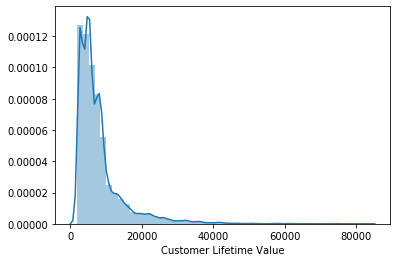

In [8]:
sns.distplot(data['Customer Lifetime Value'])

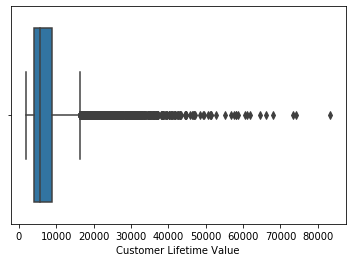

In [9]:
sns.boxplot(data['Customer Lifetime Value'])

In [10]:
#indepenent variables

In [11]:
data.columns[16:22]

Index(['Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

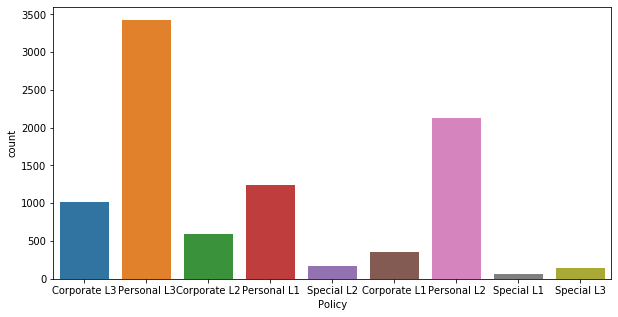

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(data['Policy'])

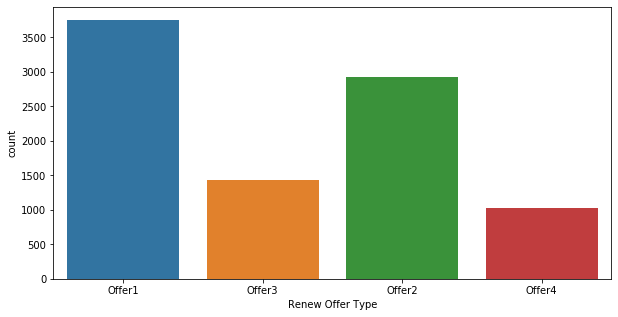

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data['Renew Offer Type'])

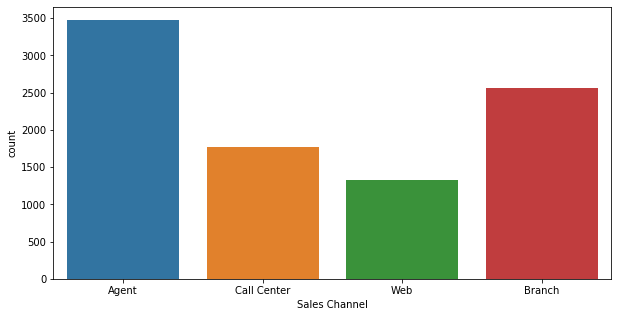

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data['Sales Channel'])

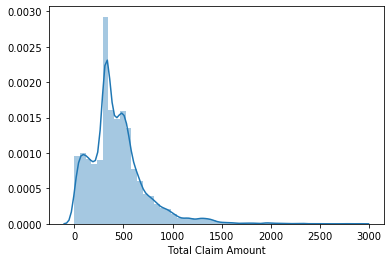

In [15]:
sns.distplot(data['Total Claim Amount'])

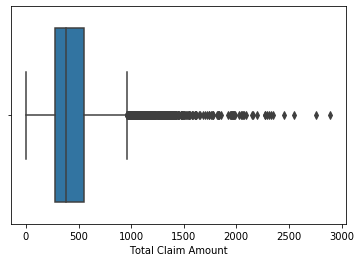

In [16]:
sns.boxplot(data['Total Claim Amount'])

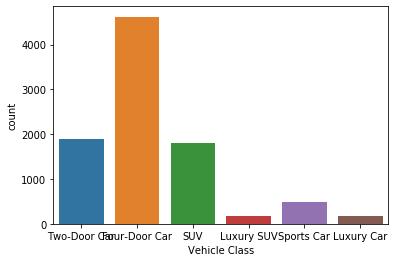

In [17]:
sns.countplot(data['Vehicle Class'])

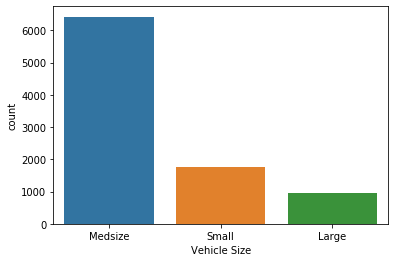

In [18]:
sns.countplot(data['Vehicle Size'])

In [19]:
#BIVARIENT ANALYSIS

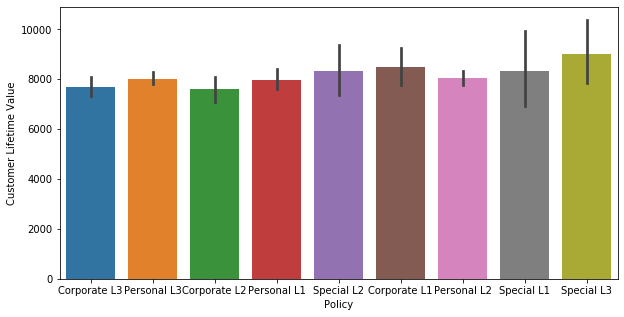

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(data['Policy'],data['Customer Lifetime Value'])

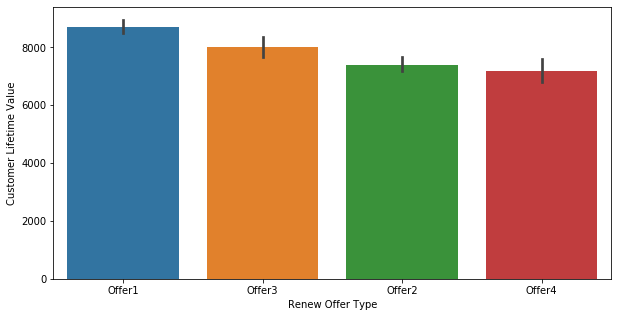

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data['Renew Offer Type'],data['Customer Lifetime Value'])

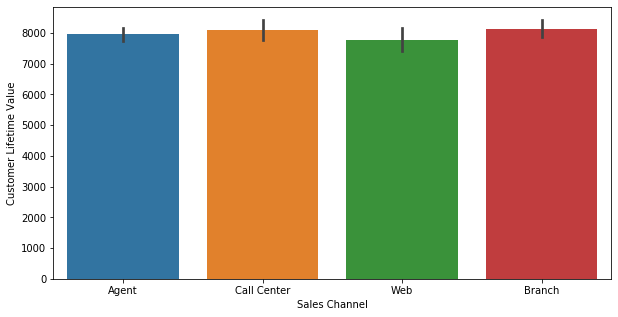

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data['Sales Channel'],data['Customer Lifetime Value'])

<Figure size 720x360 with 0 Axes>

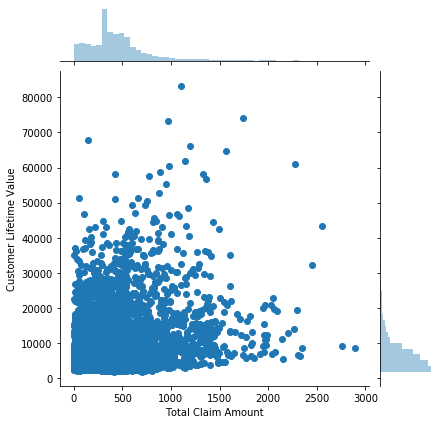

In [23]:
plt.figure(figsize=(10,5))
sns.jointplot(data['Total Claim Amount'],data['Customer Lifetime Value'])

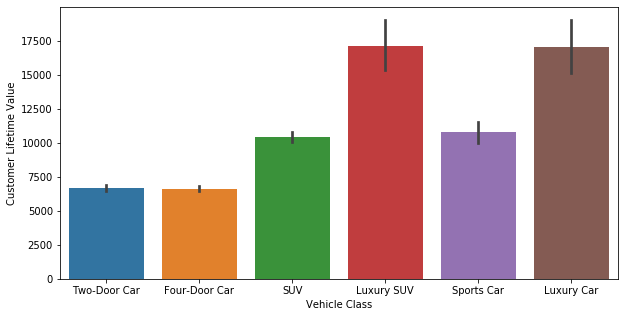

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data['Vehicle Class'],data['Customer Lifetime Value'])

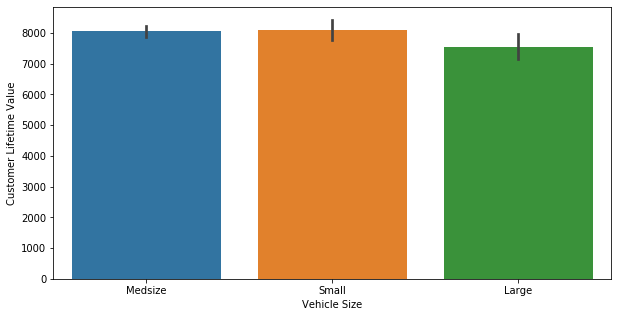

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data['Vehicle Size'],data['Customer Lifetime Value'])

In [26]:
#Multi-varient Analysis

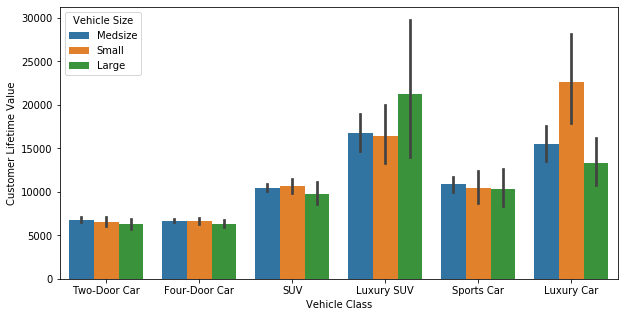

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data['Vehicle Class'],data['Customer Lifetime Value'],hue=data['Vehicle Size'])

In [28]:
#Inferencial Statistics

In [29]:
from scipy.stats import ttest_1samp,ttest_rel,ttest_ind,f_oneway,levene,chi2_contingency,binom

In [30]:
import statsmodels.api as sm
from   statsmodels.formula.api import ols

In [67]:
model = ols('Customer_Lifetime_Value ~ Policy+Renew_Offer_Type+Vehicle_Class+Vehicle_Size+Sales_Channel+Number_of_Open_Complaints+Number_of_Policies', data = data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq      df           F         PR(>F)
Policy                     5.037323e+08     8.0    1.538334   1.382124e-01
Renew_Offer_Type           1.736755e+09     3.0   14.143533   3.407242e-09
Vehicle_Class              5.295526e+10     5.0  258.749658  2.059562e-259
Vehicle_Size               1.343429e+08     2.0    1.641064   1.938311e-01
Sales_Channel              2.043524e+08     3.0    1.664176   1.724255e-01
Number_of_Open_Complaints  5.435481e+08     1.0   13.279405   2.698299e-04
Number_of_Policies         1.711552e+08     1.0    4.181488   4.089648e-02
Residual                   3.728874e+11  9110.0         NaN            NaN


In [66]:
anova_table.index[anova_table['PR(>F)']<0.05]


Index(['Renew_Offer_Type', 'Vehicle_Class', 'Number_of_Open_Complaints'], dtype='object')

In [39]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [50]:
for x in data.columns:
    if len(str.split(x))>=2:
        y=str.split(x)
        z=str.join('_',y)
        data.rename(columns={x:z},inplace=True)

In [51]:
data.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location_Code',
       'Marital_Status', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints',
       'Number_of_Policies', 'Policy_Type', 'Policy', 'Renew_Offer_Type',
       'Sales_Channel', 'Total_Claim_Amount', 'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [63]:
data[['Total_Claim_Amount','Customer_Lifetime_Value']].corr()

,Total_Claim_Amount,Customer_Lifetime_Value
Total_Claim_Amount,1.000000,0.226451
Customer_Lifetime_Value,0.226451,1.000000


In [64]:
data.corr()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Customer_Lifetime_Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


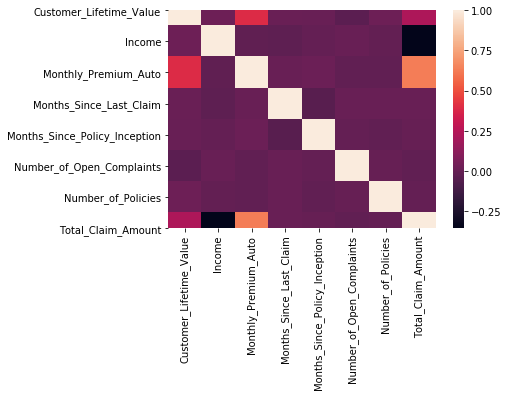

In [69]:
sns.heatmap(data.corr())

In [71]:
obj=data.select_dtypes('object')

In [73]:
from sklearn.preprocessing import LabelEncoder
data[obj.columns]=data[obj.columns].apply(LabelEncoder().fit_transform)
data.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [74]:
X=data.drop('Customer_Lifetime_Value',axis=1)
y=data['Customer_Lifetime_Value']

In [75]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.165
Model:                                 OLS   Adj. R-squared:                  0.163
Method:                      Least Squares   F-statistic:                     85.81
Date:                     Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                             13:52:44   Log-Likelihood:                -92835.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9112   BIC:                         1.859e+05
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           531.5725    473.375      1.123      0.261    -396.349    1459.494
State                            28.4756     51.117      0.557      0.577     -71.726     128.677
Response                       -448.3788    192.408     -2.330      0.020    -825.541     -71.217
Coverage                       -183.7890    113.701     -1.616      0.106    -406.669      39.091
Education                        93.0832     47.790      1.948      0.051      -0.597     186.763
EmploymentStatus               -106.4348     73.604     -1.446      0.148    -250.715      37.845
Gender                         -144.5589    132.636     -1.090      0.276    -404.556     115.438
Income                            0.0022      0.003      0.669      0.504      -0.004       0.009
Location_Code                   103.5590    116.578      0.888      0.374    -124.961     332.079
Marital_Status                 -237.2764    110.660     -2.144      0.032    -454.195     -20.358
Monthly_Premium_Auto             82.6770      2.925     28.270      0.000      76.944      88.410
Months_Since_Last_Claim           6.7966      6.546      1.038      0.299      -6.036      19.629
Months_Since_Policy_Inception    -0.7811      2.373     -0.329      0.742      -5.433       3.871
Number_of_Open_Complaints      -247.8781     72.360     -3.426      0.001    -389.719    -106.037
Number_of_Policies               63.2701     27.663      2.287      0.022       9.044     117.496
Policy_Type                     448.5882    291.059      1.541      0.123    -121.953    1019.130
Policy                          -47.9853     86.264     -0.556      0.578    -217.082     121.112
Renew_Offer_Type               -348.5079     68.493     -5.088      0.000    -482.770    -214.245
Sales_Channel                    23.5601     62.295      0.378      0.705     -98.551     145.672
Total_Claim_Amount               -0.5824      0.362     -1.609      0.108      -1.292       0.127
Vehicle_Class                    46.4930     32.422      1.434      0.152     -17.060     110.047
Vehicle_Size                    186.6798    123.372      1.513      0.130     -55.157     428.517
==============================================================================
Omnibus:                     5665.297   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64590.396
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                     3.54e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [90]:
p=lin_reg.pvalues[lin_reg.pvalues<0.05]

In [93]:
p.index

Index(['Response', 'Marital_Status', 'Monthly_Premium_Auto',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Renew_Offer_Type'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)
print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_test))


0.1681963201866039
0.1541115533348123
0.1681963201866039
0.1541115533348123


In [86]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))
y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

0.939069132623929
0.6941751809698227


In [95]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.520746144564897
